In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape)
	# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
print(trainX.shape)
	# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


In [3]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [12]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (2, 2), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
import numpy as np
print(np.isnan(trainX).any())
print(np.isnan(trainY).any())

False
False


In [ ]:
print(trainX[1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
(trainY[1])

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

wt_in = model.get_weights()
model.fit(trainX, trainY, batch_size=64, epochs=5, validation_split=0.3)

None
Epoch 1/5
657/657 [==============================] - 4s 4ms/step - loss: 0.0931 - accuracy: 0.9746 - val_loss: 0.1842 - val_accuracy: 0.9665
Epoch 2/5
657/657 [==============================] - 2s 4ms/step - loss: 0.0778 - accuracy: 0.9788 - val_loss: 0.1736 - val_accuracy: 0.9639
Epoch 3/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0669 - accuracy: 0.9817 - val_loss: 0.2603 - val_accuracy: 0.9592
Epoch 4/5
657/657 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9803 - val_loss: 0.2404 - val_accuracy: 0.9617
Epoch 5/5
657/657 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9828 - val_loss: 0.2701 - val_accuracy: 0.9619


In [11]:
model.get_weights()

[array([[-0.02548055, -0.04694562, -0.03074678, ...,  0.01239328,
         -0.05814046,  0.07329903],
        [-0.07444851,  0.0650054 ,  0.01763761, ...,  0.01039135,
          0.06349497, -0.02255683],
        [-0.02561599,  0.01493578, -0.0533219 , ...,  0.0016771 ,
         -0.0005476 ,  0.020156  ],
        ...,
        [ 0.04100481,  0.01829931,  0.01310451, ...,  0.04666523,
         -0.00860512, -0.00100428],
        [-0.0736767 ,  0.02499317,  0.00565086, ...,  0.01187108,
          0.0498466 ,  0.0257559 ],
        [-0.06205467, -0.01133826,  0.0346886 , ...,  0.05047635,
         -0.07699586,  0.02242543]], dtype=float32),
 array([-1.60770908e-01, -4.60168958e-01,  4.62337546e-02, -2.93763131e-01,
        -7.88042009e-01, -6.07241690e-02, -3.32802057e-01,  1.47407815e-01,
        -4.84187156e-01, -3.20159554e-01, -7.37413391e-02, -4.23988968e-01,
        -3.54459167e-01,  5.22957385e-01, -6.32681549e-01, -5.25537789e-01,
         2.88278520e-01,  9.19343531e-03, -2.35350609e

In [8]:
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 2ms/step - loss: 0.1438 - accuracy: 0.9685
> 96.850


In [14]:
predictions = model.predict(testX)
predictions.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [15]:
predictions[25]

array([0.08219641, 0.10532872, 0.04025116, 0.03293898, 0.06172019,
       0.3004406 , 0.08477788, 0.16065964, 0.08912445, 0.042562  ],
      dtype=float32)

In [16]:
print(np.argmax(predictions[25]))

5


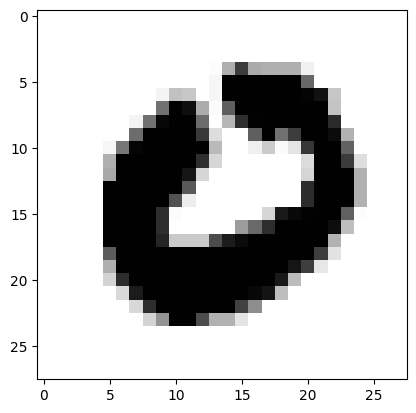

In [17]:
a = np.reshape(testX[25],(28,28))
plt.imshow(a,cmap=plt.cm.binary)
plt.show()

In [ ]:
trainX.shape

(60000, 28, 28, 1)